In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\zomato.csv',encoding='latin')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Removing the Unwanted Columns

In [3]:
df.drop(columns=['url','address','phone'],inplace=True)

# Checking the data types of the columns 

In [4]:
df.info()
# Almost all the columns are of Object Type and there are 51717 no of rows and 14 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  menu_item                    51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

# Checking the Null-values

In [5]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Replacing and removing the NULL values 

In [ ]:
#conerting the rating to simpler from
# Replacing restaurents with there ratings given as new to NAN and dopping them finally
df['rate'] = df['rate'].replace('NEW',np.NAN)
df['rate'] = df['rate'].replace('-',np.NAN)

In [7]:
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex=True) # removing the sq brackets from the rate column
df['rate'] = df['rate'].astype(str) #changing the dtype to string 
df['rate'] = df['rate'].apply(lambda r:r.replace('/5','')) # replacing the /5 with the blank values
df['rate'] = df['rate'].apply(lambda r:float(r)) # and then converting that value into the float datatype

In [8]:
# as we can see that the rating is the Continuous values so we have to replace it with the mean value 
df['rate'].mean() #so the mean value of the rete column is 3.7
df['rate'] = df['rate'].fillna(df['rate'].mean())

In [9]:
#replace null values with their mode from dish_liked column as it a descrete variable
df['dish_liked'].mode(), df['cuisines'].mode()

(0    Biryani
 Name: dish_liked, dtype: object,
 0    North Indian
 Name: cuisines, dtype: object)

In [10]:
df['dish_liked'] = df['dish_liked'].fillna('Biryani')

In [11]:
df['cuisines'] = df['cuisines'].fillna('North Indian')

In [12]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
dish_liked                       0
cuisines                         0
approx_cost(for two people)    346
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [13]:
# As we can see that there are very less NULL value present in our data , we can also convert them into 
# mean value or the median value .But here i am going to drop them
df.dropna(how='any',inplace=True)

In [14]:
df.isnull().sum()
# As we can see that there is no null values here in our dataset

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [15]:
df.describe()
# As we can see from the Initial analysis the mean rating of all the restaurant is : 3.9 nearly 4
# 50% of the restaurant has the vote of 4 
# maximum rating of the restaurant is 4.9

,rate,votes
count,51167.000000,51167.000000
mean,3.701666,284.813943
std,0.395137,806.363502
min,1.800000,0.000000
25%,3.500000,7.000000
50%,3.700449,41.000000
75%,3.900000,199.000000
max,4.900000,16832.000000


# EDA

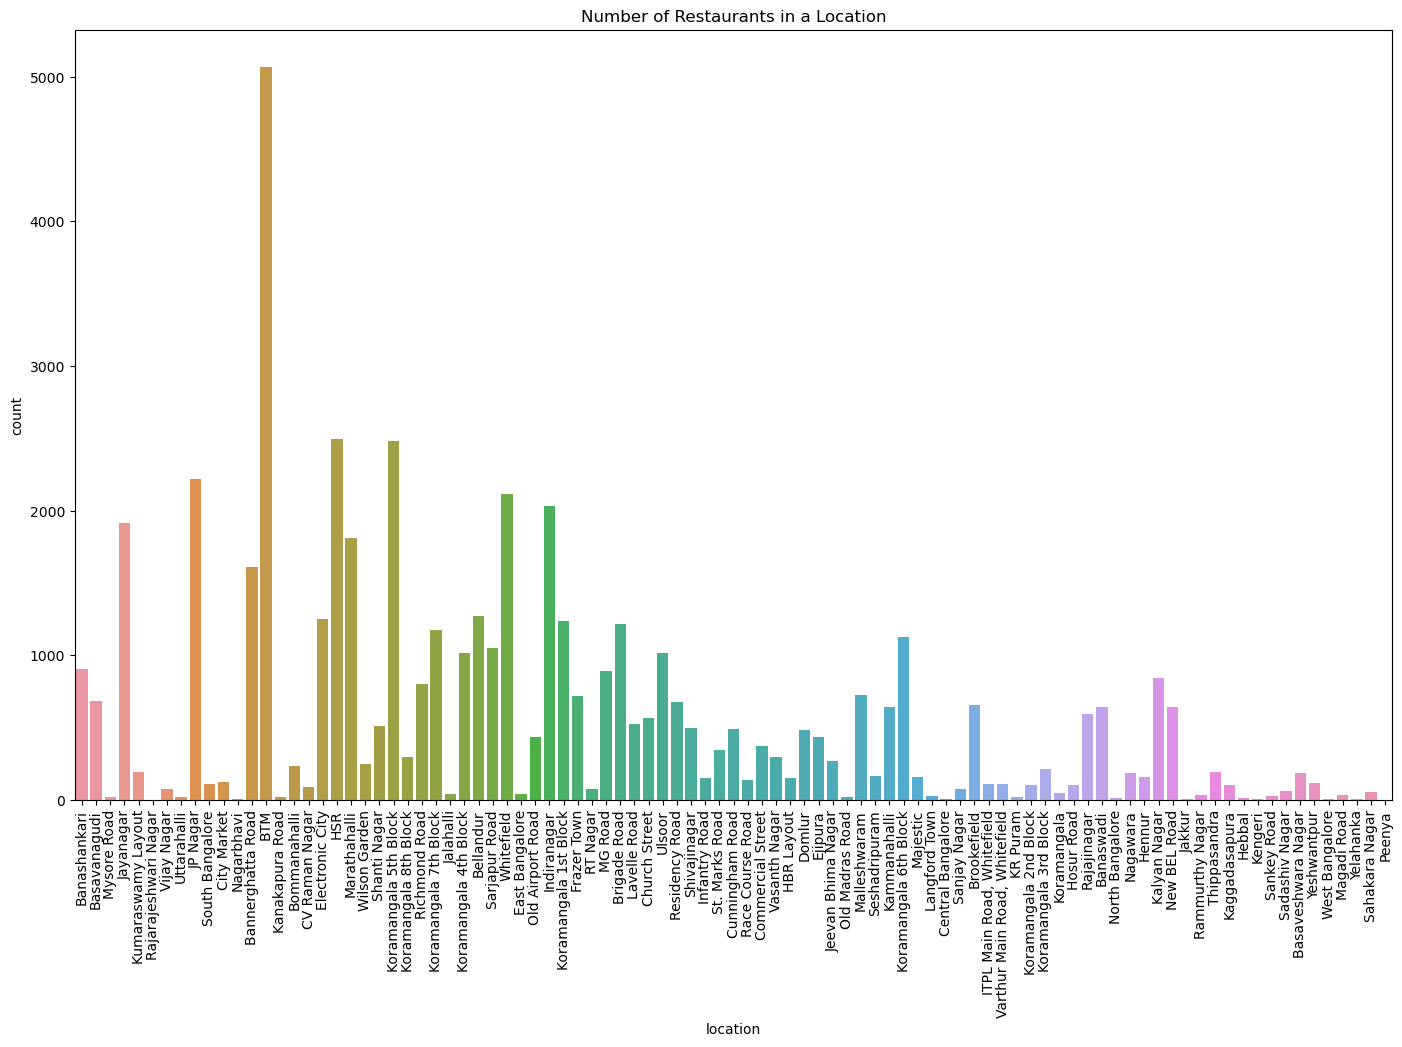

In [16]:
plt.figure(figsize=(17,10))
sns.countplot(x=df['location'])
plt.title('Number of Restaurants in a Location')
plt.xticks(rotation=90);

In [17]:
loca = df.groupby(['location'])['online_order'].count()
loca = loca.sort_values(ascending=False).head(10)#here we will get the data in series
on_da = loca.to_frame()
on_da.head()
# The Higest orders that the ZOMATO has received are from the KORAMANGALA 5th Block
# As it is famous from the commercial cum residential sub locality in Koramangala,
# Southern Part of Bangalore. 
# It is a locality famous for pubs, eateries and corporate offices.
# The reason behind high online orders is: the place is very close to the major IT hub and the electronic 
# City .And because of that people leave at the close by areas.
# As we can see that the most of the ONLINE orders are from the  
# B = Bommanahalli, 
# T = Tavarekere 
# M = Madiwala

,online_order
location,
BTM,5071
HSR,2496
Koramangala 5th Block,2481
JP Nagar,2219
Whitefield,2117


In [18]:
highest_rated_rest = df.loc[df.groupby("location")["rate"].idxmax(), ["location", "name", "rate"]]
high = highest_rated_rest.head(5)
high

,location,name,rate
8260,BTM,AB's - Absolute Barbecues,4.9
632,Banashankari,Taaza Thindi,4.7
25220,Banaswadi,Corner House Ice Cream,4.4
1035,Bannerghatta Road,Galito's,4.6
3338,Basavanagudi,Brahmin's Coffee Bar,4.8


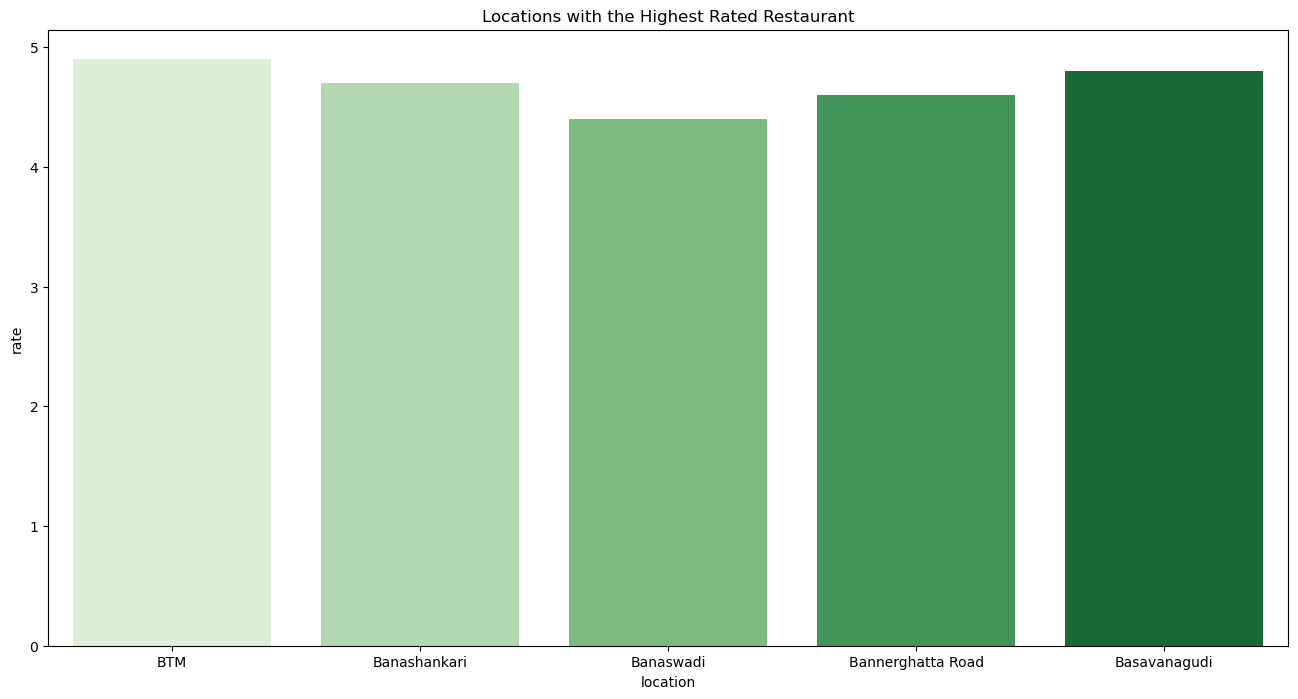

In [76]:
plt.figure(figsize=(16, 8))
sns.barplot(x='location',y='rate',data=high,palette = "Greens")
plt.title('Locations with the Highest Rated Restaurant')
plt.show()
# as we can see from this is the highest rated restaurant are in the following area in the city of Banglore

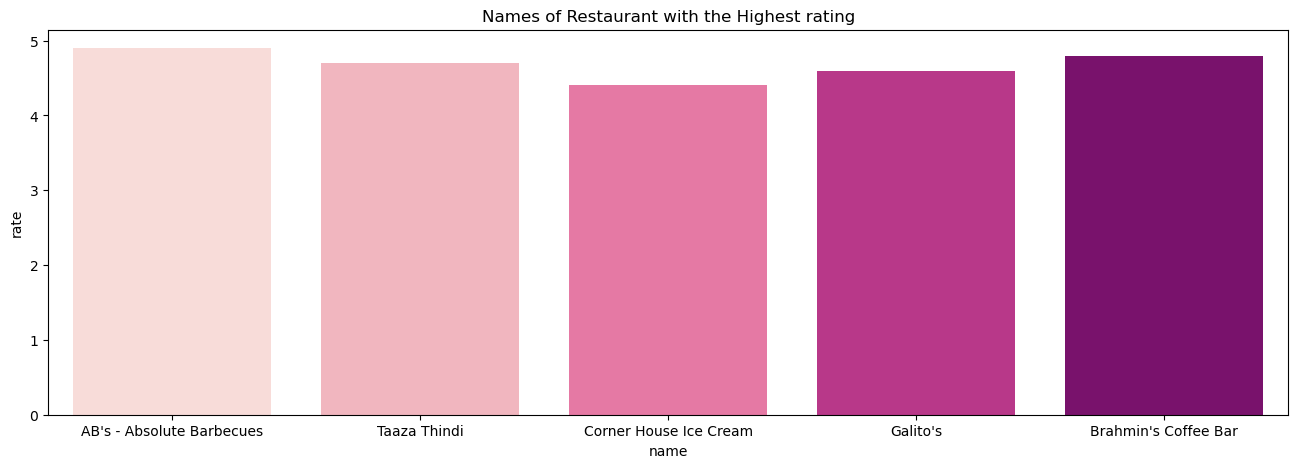

In [77]:
plt.figure(figsize=(16, 5))
sns.barplot(x='name',y='rate',data=high,palette = "RdPu")
plt.title('Names of Restaurant with the Highest rating')
plt.show()
# These are some of the  Top 5 restaurants you can visite by rating according to the location 

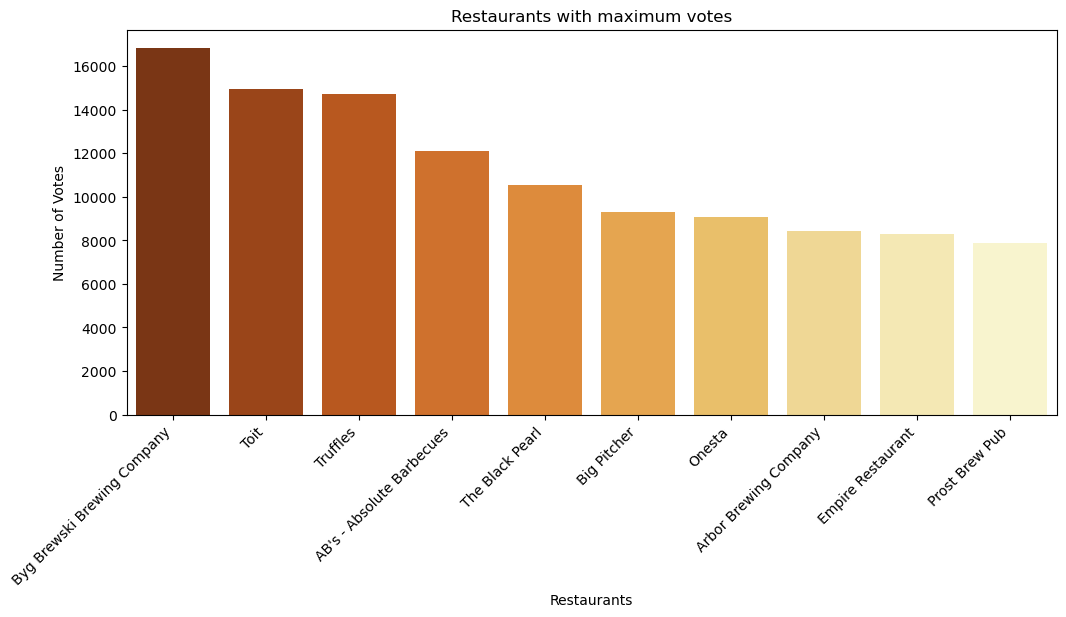

In [21]:
plt.figure(figsize=(12, 5))
top_votes= df.groupby('name')['votes'].max().sort_values(ascending=False).head(10)
sns.barplot(x=top_votes.index,y=top_votes.values,palette="YlOrBr_r" )
plt.xticks(rotation=45,ha='right')
plt.title('Restaurants with maximum votes')
plt.xlabel('Restaurants')
plt.ylabel('Number of Votes');

In [102]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'diff'],
      dtype='object')

In [22]:
rest_type = df['rest_type'].value_counts().head()
# as we can see that there are more no of casula dining places , iceam-parlors, cafe ,quick-bites

In [23]:
df['rest_type'].value_counts().tail()
# there are less number of pubs club, dhaba, food court 

Dessert Parlor, Kiosk         2
Food Court, Beverage Shop     2
Dessert Parlor, Food Court    2
Quick Bites, Kiosk            1
Sweet Shop, Dessert Parlor    1
Name: rest_type, dtype: int64

In [24]:
liked_dish = [x for x in df['dish_liked']]
dish=[]
for i in range(len(liked_dish)):
    temp = str(liked_dish[i]).split()
    dish.extend(temp)
#print(dish)
new_dish = [i.lower().replace(',','') for i in dish]
d={}
for i in new_dish:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

In [25]:
new = pd.DataFrame.from_dict(d, orient='index',columns=['No_count']).reset_index()
new.rename(columns = {'index':'Dish name'}, inplace = True)
# as we can see that the Chicken was the most popular Dish that was ordered 

In [80]:
sort = new.sort_values(by='No_count',ascending=False).head(10)
sort

,Dish name,No_count
10,biryani,35319
21,chicken,14638
31,pizza,4637
0,pasta,4098
15,chocolate,3300
81,burgers,3001
3,masala,2964
314,cocktails,2809
52,coffee,2776
5,paneer,2612


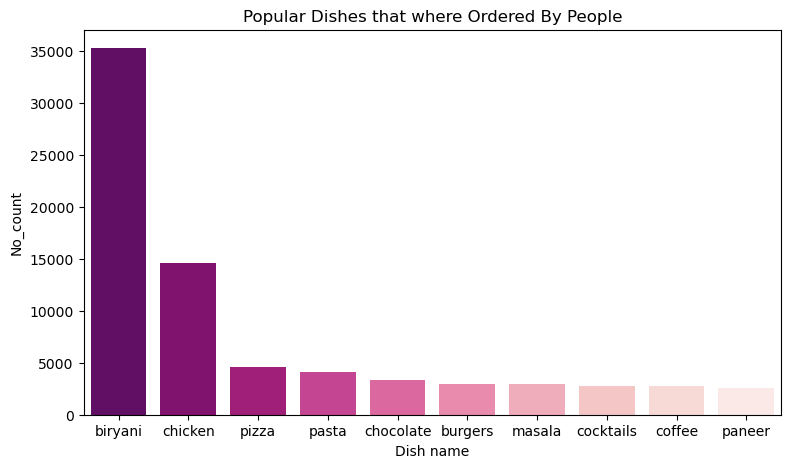

In [97]:
plt.figure(figsize=(9, 5))
sns.barplot(x='Dish name',y='No_count',data=sort,palette = "RdPu_r")
plt.title('Popular Dishes that where Ordered By People')
plt.show()
# as we can see the Biryani was the famous dish that was ordered by people at Bengalore

In [28]:
popular_cu = [x for x in df['cuisines']]
cuisine=[]
for i in range(len(popular_cu)):
    temp1 = popular_cu[i].split(',')
    cuisine.extend(temp1)
#print(cuisine)
new_cuisine = [i.strip().lower().replace(',','') for i in cuisine]
cd={}
for i in new_cuisine:
    if i in cd:
        cd[i]+=1
    else:
        cd[i]=1

In [29]:
pop_cu = pd.DataFrame.from_dict(cd, orient='index',columns=['No_count']).reset_index()
pop_cu.rename(columns = {'index':'Cuisine Name'}, inplace = True)
sort_cu = pop_cu.sort_values(by='No_count',ascending=False).head(10)
sort_cu

,Cuisine Name,No_count
0,north indian,20860
2,chinese,15368
7,south indian,8572
14,fast food,8039
21,biryani,6428
11,continental,5716
20,desserts,5585
4,cafe,5251
13,beverages,4686
6,italian,3353


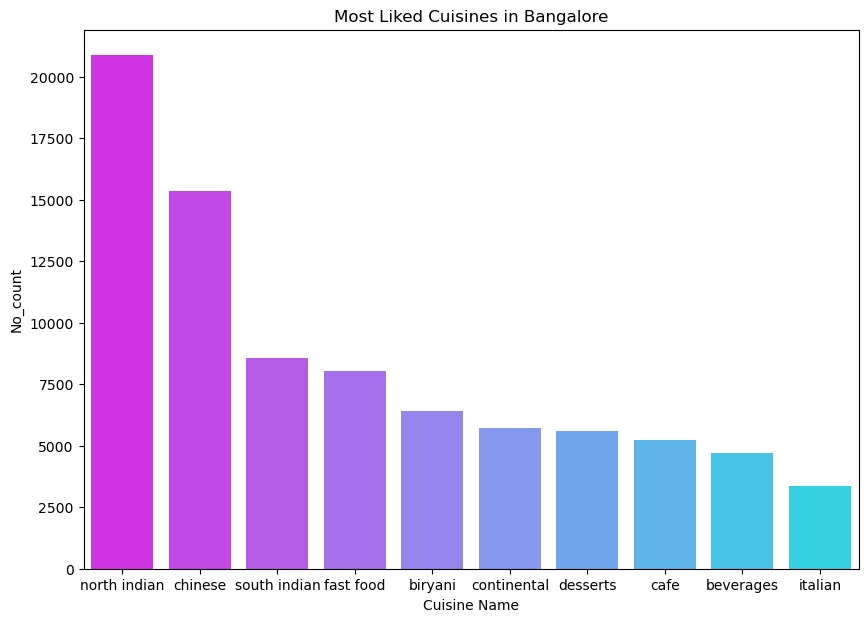

In [84]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Cuisine Name',y='No_count',data=sort_cu,palette = "cool_r")
plt.title('Most Liked Cuisines in Bangalore')
plt.show()
# North-Indian Cuisine was the most famous dist that was popular 

In [31]:
# As the column dataype was in the Object i.e string type for getting the stats info outof it  had to 
# convert that into the Integer type
df['approx_cost(for two people)'] = [str(i).replace(',','') for i in df['approx_cost(for two people)']]

In [32]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace('nan', np.nan) 
# here there where some values that where <nan> so here we replaced them  nan so that we ca easily convert

In [33]:
# Convert 'col1' to integer
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float).astype('Int64')
df['approx_cost(for two people)'].dtype

Int64Dtype()

In [34]:
df['approx_cost(for two people)'].describe()
# the max amount that was spent on a single order : 6000 
# the mean amount that was spent on a single order is : 555

count    51167.000000
mean       555.970157
std        439.500518
min         40.000000
25%        300.000000
50%        400.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

In [35]:
df.rename(columns = {'approx_cost(for two people)':'Cost'}, inplace = True)

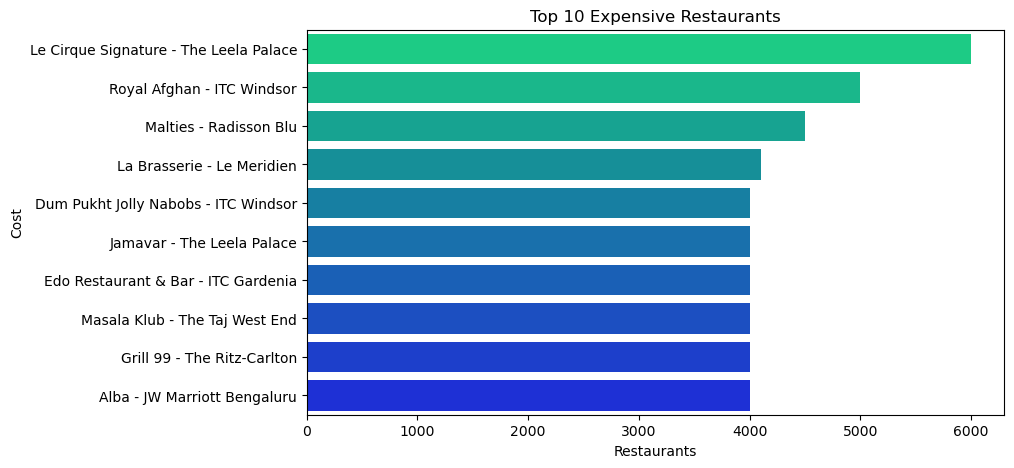

In [36]:
plt.figure(figsize=(9, 5))
top_exp=df.groupby('name')['Cost'].max().sort_values(ascending= False).head(10)
sns.barplot(y=top_exp.index, x=top_exp.values,palette="winter_r")
plt.title('Top 10 Expensive Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Cost');
#These are some of the costliest restaurants that you can find on the zomato at Bengalore from where you 
# order or dine at.

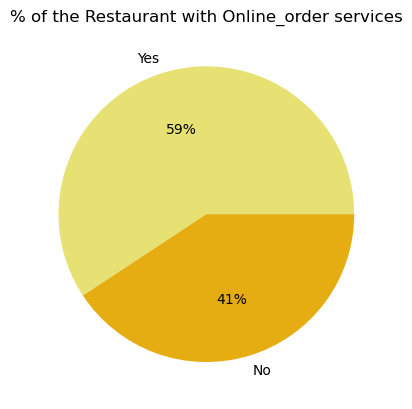

In [100]:
value = df['online_order'].value_counts()
labels = ['Yes','No']
palette_color = sns.color_palette('CMRmap_r')
plt.title('% of the Restaurant with Online_order services')
plt.pie(x=value,labels = labels ,data = df,autopct='%.0f%%',colors = palette_color)
plt.show()

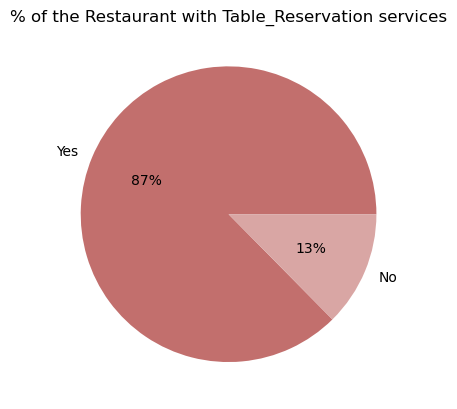

In [99]:
value = df['book_table'].value_counts()
labels = ['Yes','No']
palette_color = sns.color_palette('vlag_r')
plt.title('% of the Restaurant with Table_Reservation services')
plt.pie(x=value,labels = labels ,data = df,autopct='%.0f%%',colors = palette_color)
plt.show()
# As we can see from here that 87% of the Zomato restaurant provides the Online_booking services